In [1]:
import cx_Oracle
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas as pd 
import logging
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Database connection setup
dsn = cx_Oracle.makedsn('et02-cvm-exascan.safaricomet.net', '1521', service_name='CVMDMKL.safaricomet.net')
db = cx_Oracle.connect(user='cvm_analytics', password='Incorrect5th@12345', dsn=dsn)
cursor = db.cursor()
logging.debug("Connected to the database.")
print("Connected to the database.")

Connected to the database.


In [5]:
# SQL Queries
query1 = """
SELECT * 
FROM CVM_DM_PROD.CHURN_TRAINING_VALIDATION ctv 
WHERE ctv.PROCESSING_DATE = TO_DATE('2023-11-01','yyyy-mm-dd')

"""

In [7]:
cursor.execute(query1)
rows_query1 = cursor.fetchall()
count_query1 = len(rows_query1)
logging.debug(f"Query executed. Number of rows returned: {count_query1}")
print(f"Query executed. Number of rows returned: {count_query1}")

Query executed. Number of rows returned: 1544327


In [9]:
def process_and_merge_chunks(data_list, chunk_size):
    """
    Processes a large list of data in chunks, converts each chunk to a DataFrame, and merges them into a single DataFrame.

    Parameters:
    - data_list: The complete list of data.
    - chunk_size: The number of items per chunk to process at a time.

    Returns:
    - A single DataFrame containing all the merged data.
    """
    # Initialize an empty list to store DataFrames
    dfs = []
    
    # Process the data list in chunks
    for i in range(0, len(data_list), chunk_size):
        # Extract a chunk of data
        chunk = data_list[i:i + chunk_size]
        
        # Convert the chunk to a DataFrame
        df_chunk = pd.DataFrame(chunk)
        
        # Append the DataFrame to the list
        dfs.append(df_chunk)
    
    # Concatenate all DataFrames into a single DataFrame
    merged_df = pd.concat(dfs, ignore_index=True)
    
    return merged_df


In [11]:
# Example usage
data_list = rows_query1  # Replace with your list of data
chunk_size = 10000  # Adjust the chunk size as needed
merged_df = process_and_merge_chunks(data_list, chunk_size)

In [13]:
CHUR_COLUMN_NAME=['PROCESSING_DATE',
'MSISDN',
'SMS_W1_REVN',
'SMS_W2_REVN',
'SMS_W3_REVN',
'SMS_W4_REVN',
'SMS_W5_REVN',
'SMS_W6_REVN',
'SMS_W7_REVN',
'SMS_W8_REVN',
'SMS_W9_REVN',
'SMS_W10_REVN',
'SMS_W11_REVN',
'SMS_W12_REVN',
'SMS_M1_REVN',
'SMS_M2_REVN',
'SMS_M3_REVN',
'SMS_W1_CNT',
'SMS_W2_CNT',
'SMS_W3_CNT',
'SMS_W4_CNT',
'SMS_W5_CNT',
'SMS_W6_CNT',
'SMS_W7_CNT',
'SMS_W8_CNT',
'SMS_W9_CNT',
'SMS_W10_CNT',
'SMS_W11_CNT',
'SMS_W12_CNT',
'SMS_M1_CNT',
'SMS_M2_CNT',
'SMS_M3_CNT',
'SMS_SINCE_LAST_USED',
'SMS_ACTIVE_DAYS_W1',
'SMS_ACTIVE_DAYS_W2',
'SMS_ACTIVE_DAYS_W3',
'SMS_ACTIVE_DAYS_W4',
'SMS_ACTIVE_DAYS_W5',
'SMS_ACTIVE_DAYS_W6',
'SMS_ACTIVE_DAYS_W7',
'SMS_ACTIVE_DAYS_W8',
'SMS_ACTIVE_DAYS_W9',
'SMS_ACTIVE_DAYS_W10',
'SMS_ACTIVE_DAYS_W11',
'SMS_ACTIVE_DAYS_W12',
'SMS_ACTIVE_DAYS_M1',
'SMS_ACTIVE_DAYS_M2',
'SMS_ACTIVE_DAYS_M3',
'GPRS_W1_USG_MBS',
'GPRS_W2_USG_MBS',
'GPRS_W3_USG_MBS',
'GPRS_W4_USG_MBS',
'GPRS_W5_USG_MBS',
'GPRS_W6_USG_MBS',
'GPRS_W7_USG_MBS',
'GPRS_W8_USG_MBS',
'GPRS_W9_USG_MBS',
'GPRS_W10_USG_MBS',
'GPRS_W11_USG_MBS',
'GPRS_W12_USG_MBS',
'GPRS_M1_USG_MBS',
'GPRS_M2_USG_MBS',
'GPRS_M3_USG_MBS',
'GPRS_W1_REVENUE',
'GPRS_W2_REVENUE',
'GPRS_W3_REVENUE',
'GPRS_W4_REVENUE',
'GPRS_W5_REVENUE',
'GPRS_W6_REVENUE',
'GPRS_W7_REVENUE',
'GPRS_W8_REVENUE',
'GPRS_W9_REVENUE',
'GPRS_W10_REVENUE',
'GPRS_W11_REVENUE',
'GPRS_W12_REVENUE',
'GPRS_REVENUE_M1',
'GPRS_REVENUE_M2',
'GPRS_REVENUE_M3',
'GPRS_W1_CNT',
'GPRS_W2_CNT',
'GPRS_W3_CNT',
'GPRS_W4_CNT',
'GPRS_W5_CNT',
'GPRS_W6_CNT',
'GPRS_W7_CNT',
'GPRS_W8_CNT',
'GPRS_W9_CNT',
'GPRS_W10_CNT',
'GPRS_W11_CNT',
'GPRS_W12_CNT',
'GPRS_M1_CNT',
'GPRS_M2_CNT',
'GPRS_M3_CNT',
'FREE_GPRS_W1_USG_MBS',
'FREE_GPRS_W2_USG_MBS',
'FREE_GPRS_W3_USG_MBS',
'FREE_GPRS_W4_USG_MBS',
'FREE_GPRS_W5_USG_MBS',
'FREE_GPRS_W6_USG_MBS',
'FREE_GPRS_W7_USG_MBS',
'FREE_GPRS_W8_USG_MBS',
'FREE_GPRS_W9_USG_MBS',
'FREE_GPRS_W10_USG_MBS',
'FREE_GPRS_W11_USG_MBS',
'FREE_GPRS_W12_USG_MBS',
'FREE_GPRS_USG_M1',
'FREE_GPRS_USG_M2',
'FREE_GPRS_USG_M3',
'FREE_GPRS_W1_CNT',
'FREE_GPRS_W2_CNT',
'FREE_GPRS_W3_CNT',
'FREE_GPRS_W4_CNT',
'FREE_GPRS_W5_CNT',
'FREE_GPRS_W6_CNT',
'FREE_GPRS_W7_CNT',
'FREE_GPRS_W8_CNT',
'FREE_GPRS_W9_CNT',
'FREE_GPRS_W10_CNT',
'FREE_GPRS_W11_CNT',
'FREE_GPRS_W12_CNT',
'FREE_GPRS_CNT_M1',
'FREE_GPRS_CNT_M2',
'FREE_GPRS_CNT_M3',
'DATA_SINCE_LAST_USED',
'DATA_ACTIVE_DAYS_W1',
'DATA_ACTIVE_DAYS_W2',
'DATA_ACTIVE_DAYS_W3',
'DATA_ACTIVE_DAYS_W4',
'DATA_ACTIVE_DAYS_W5',
'DATA_ACTIVE_DAYS_W6',
'DATA_ACTIVE_DAYS_W7',
'DATA_ACTIVE_DAYS_W8',
'DATA_ACTIVE_DAYS_W9',
'DATA_ACTIVE_DAYS_W10',
'DATA_ACTIVE_DAYS_W11',
'DATA_ACTIVE_DAYS_W12',
'DATA_ACTIVE_DAYS_M1',
'DATA_ACTIVE_DAYS_M2',
'DATA_ACTIVE_DAYS_M3',
'OG_VC_MOUS_W1_CNT',
'OG_VC_MOUS_W2_CNT',
'OG_VC_MOUS_W3_CNT',
'OG_VC_MOUS_W4_CNT',
'OG_VC_MOUS_W5_CNT',
'OG_VC_MOUS_W6_CNT',
'OG_VC_MOUS_W7_CNT',
'OG_VC_MOUS_W8_CNT',
'OG_VC_MOUS_W9_CNT',
'OG_VC_MOUS_W10_CNT',
'OG_VC_MOUS_W11_CNT',
'OG_VC_MOUS_W12_CNT',
'OG_VC_MOUS_M1_CNT',
'OG_VC_MOUS_M2_CNT',
'OG_VC_MOUS_M3_CNT',
'OG_VC_W1_CNT',
'OG_VC_W2_CNT',
'OG_VC_W3_CNT',
'OG_VC_W4_CNT',
'OG_VC_W5_CNT',
'OG_VC_W6_CNT',
'OG_VC_W7_CNT',
'OG_VC_W8_CNT',
'OG_VC_W9_CNT',
'OG_VC_W10_CNT',
'OG_VC_W11_CNT',
'OG_VC_W12_CNT',
'OG_VC_M1_CNT',
'OG_VC_M2_CNT',
'OG_VC_M3_CNT',
'OG_VC_R1_CNT',
'OG_VC_R2_CNT',
'OG_VC_R3_CNT',
'OG_VC_R4_CNT',
'OG_VC_R5_CNT',
'OG_VC_R6_CNT',
'OG_VC_R7_CNT',
'OG_VC_R8_CNT',
'OG_VC_R9_CNT',
'OG_VC_R10_CNT',
'OG_VC_R11_CNT',
'OG_VC_R12_CNT',
'OG_VC_RM1_CNT',
'OG_VC_RM2_CNT',
'OG_VC_RM3_CNT',
'FREE_OG_VC_W1_CNT',
'FREE_OG_VC_W2_CNT',
'FREE_OG_VC_W3_CNT',
'FREE_OG_VC_W4_CNT',
'FREE_OG_VC_W5_CNT',
'FREE_OG_VC_W6_CNT',
'FREE_OG_VC_W7_CNT',
'FREE_OG_VC_W8_CNT',
'FREE_OG_VC_W9_CNT',
'FREE_OG_VC_W10_CNT',
'FREE_OG_VC_W11_CNT',
'FREE_OG_VC_W12_CNT',
'FREE_OG_VC_M1_CNT',
'FREE_OG_VC_M2_CNT',
'FREE_OG_VC_M3_CNT',
'FREE_OG_VC_W1_MOUS',
'FREE_OG_VC_W2_MOUS',
'FREE_OG_VC_W3_MOUS',
'FREE_OG_VC_W4_MOUS',
'FREE_OG_VC_W5_MOUS',
'FREE_OG_VC_W6_MOUS',
'FREE_OG_VC_W7_MOUS',
'FREE_OG_VC_W8_MOUS',
'FREE_OG_VC_W9_MOUS',
'FREE_OG_VC_W10_MOUS',
'FREE_OG_VC_W11_MOUS',
'FREE_OG_VC_W12_MOUS',
'FREE_OG_VC_MOUS_M1',
'FREE_OG_VC_MOUS_M2',
'FREE_OG_VC_MOUS_M3',
'IN_VC_W1_MOUS',
'IN_VC_W2_MOUS',
'IN_VC_W3_MOUS',
'IN_VC_W4_MOUS',
'IN_VC_W5_MOUS',
'IN_VC_W6_MOUS',
'IN_VC_W7_MOUS',
'IN_VC_W8_MOUS',
'IN_VC_W9_MOUS',
'IN_VC_W10_MOUS',
'IN_VC_W11_MOUS',
'IN_VC_W12_MOUS',
'IN_VC_MOUS_M1',
'IN_VC_MOUS_M2',
'IN_VC_MOUS_M3',
'IN_VC_W1_CNT',
'IN_VC_W2_CNT',
'IN_VC_W3_CNT',
'IN_VC_W4_CNT',
'IN_VC_W5_CNT',
'IN_VC_W6_CNT',
'IN_VC_W7_CNT',
'IN_VC_W8_CNT',
'IN_VC_W9_CNT',
'IN_VC_W10_CNT',
'IN_VC_W11_CNT',
'IN_VC_W12_CNT',
'IN_VC_CNT_M1',
'IN_VC_CNT_M2',
'IN_VC_CNT_M3',
'IN_VC_W1_REVENUE',
'IN_VC_W2_REVENUE',
'IN_VC_W3_REVENUE',
'IN_VC_W4_REVENUE',
'IN_VC_W5_REVENUE',
'IN_VC_W6_REVENUE',
'IN_VC_W7_REVENUE',
'IN_VC_W8_REVENUE',
'IN_VC_W9_REVENUE',
'IN_VC_W10_REVENUE',
'IN_VC_W11_REVENUE',
'IN_VC_W12_REVENUE',
'IN_VC_REVENUE_M1',
'IN_VC_REVENUE_M2',
'IN_VC_REVENUE_M3',
'VOICE_SINCE_LAST_USED',
'VOICE_ACTIVE_DAYS_W1',
'VOICE_ACTIVE_DAYS_W2',
'VOICE_ACTIVE_DAYS_W3',
'VOICE_ACTIVE_DAYS_W4',
'VOICE_ACTIVE_DAYS_W5',
'VOICE_ACTIVE_DAYS_W6',
'VOICE_ACTIVE_DAYS_W7',
'VOICE_ACTIVE_DAYS_W8',
'VOICE_ACTIVE_DAYS_W9',
'VOICE_ACTIVE_DAYS_W10',
'VOICE_ACTIVE_DAYS_W11',
'VOICE_ACTIVE_DAYS_W12',
'VOICE_ACTIVE_DAYS_M1',
'VOICE_ACTIVE_DAYS_M2',
'VOICE_ACTIVE_DAYS_M3',
'RECHARGE_W1_CNT',
'RECHARGE_W2_CNT',
'RECHARGE_W3_CNT',
'RECHARGE_W4_CNT',
'RECHARGE_W5_CNT',
'RECHARGE_W6_CNT',
'RECHARGE_W7_CNT',
'RECHARGE_W8_CNT',
'RECHARGE_W9_CNT',
'RECHARGE_W10_CNT',
'RECHARGE_W11_CNT',
'RECHARGE_W12_CNT',
'RECHARGE_M1_CNT',
'RECHARGE_M2_CNT',
'RECHARGE_M3_CNT',
'RECHARGE_W1_REVN',
'RECHARGE_W2_REVN',
'RECHARGE_W3_REVN',
'RECHARGE_W4_REVN',
'RECHARGE_W5_REVN',
'RECHARGE_W6_REVN',
'RECHARGE_W7_REVN',
'RECHARGE_W8_REVN',
'RECHARGE_W9_REVN',
'RECHARGE_W10_REVN',
'RECHARGE_W11_REVN',
'RECHARGE_W12_REVN',
'RECHARGE_M1_REVN',
'RECHARGE_M2_REVN',
'RECHARGE_M3_REVN',
'RECHARGE_SINCE_LAST_USED',
'RECH_ACTIVE_DAYS_W1',
'RECH_ACTIVE_DAYS_W2',
'RECH_ACTIVE_DAYS_W3',
'RECH_ACTIVE_DAYS_W4',
'RECH_ACTIVE_DAYS_W5',
'RECH_ACTIVE_DAYS_W6',
'RECH_ACTIVE_DAYS_W7',
'RECH_ACTIVE_DAYS_W8',
'RECH_ACTIVE_DAYS_W9',
'RECH_ACTIVE_DAYS_W10',
'RECH_ACTIVE_DAYS_W11',
'RECH_ACTIVE_DAYS_W12',
'RECH_ACTIVE_DAYS_M1',
'RECH_ACTIVE_DAYS_M2',
'RECH_ACTIVE_DAYS_M3',
'VLR_ACTIVE_DAYS_W1',
'VLR_ACTIVE_DAYS_W2',
'VLR_ACTIVE_DAYS_W3',
'VLR_ACTIVE_DAYS_W4',
'VLR_ACTIVE_DAYS_W5',
'VLR_ACTIVE_DAYS_W6',
'VLR_ACTIVE_DAYS_W7',
'VLR_ACTIVE_DAYS_W8',
'VLR_ACTIVE_DAYS_W9',
'VLR_ACTIVE_DAYS_W10',
'VLR_ACTIVE_DAYS_W11',
'VLR_ACTIVE_DAYS_W12',
'VLR_ACTIVE_DAYS_M1',
'VLR_ACTIVE_DAYS_M2',
'VLR_ACTIVE_DAYS_M3',
'PROFILE_TYPE',
'ACTIVATION_REGION',
'AON',
'DEVICE_TYPE',
'DEVICE_DATA_CAPABLITY',
'DEVICE_4G_CAPABLITY','CHURN_LABEL']

In [15]:
merged_df.columns = CHUR_COLUMN_NAME

In [19]:
merged_df.to_csv('merged_df.csv',index= False)

In [21]:
#remove ['EBU-Internal','EBU - Sim_Box' ,CBU - Sim_Box','CBU - Staff' 'EBU-Test' 'EBU - Staff']
# List of values to remove
values_to_remove = ['EBU-Internal', 'EBU - Sim_Box', 'CBU - Sim_Box', 'CBU - Staff', 'EBU-Test', 'EBU - Staff']
# Filter the DataFrame
merged_df = merged_df[~merged_df['PROFILE_TYPE'].isin(values_to_remove)]


In [23]:
#Remove PROCESSING_DATE, PROFILE_TYPE,ACTIVATION_REGION
columns_to_remove = ['MSISDN','PROCESSING_DATE','PROFILE_TYPE','ACTIVATION_REGION','DEVICE_TYPE','DEVICE_DATA_CAPABLITY', 'DEVICE_4G_CAPABLITY']
merged_df = merged_df.drop(columns=columns_to_remove)

In [119]:
# Impute missing values in merged_df with zero
merged_df_imputed = merged_df.fillna(0)

# Check the shape to ensure no rows were removed
print(f"Shape after imputing NaNs with zero: {merged_df_imputed.shape}")

Shape after imputing NaNs with zero: (1524468, 336)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
# Step 1: Pearson Correlation-Based Feature Selection
# Assuming X_Final and CHURN_LABEL are defined
correlation_matrix = merged_df_imputed.corr()

In [33]:
# Set thresholds
target_threshold = 0.1  # Correlation with target
feature_correlation_threshold = 0.1  # Correlation among features

# Select features with sufficient correlation to target
correlation_with_target = correlation_matrix['CHURN_LABEL'].drop('CHURN_LABEL')
relevant_features = correlation_with_target[abs(correlation_with_target) > target_threshold].index.tolist()


In [121]:
X_relevant = merged_df_imputed[relevant_features]

In [39]:
X_relevant.to_csv('After_Pearson.csv',index = False)

In [123]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'df' is your DataFrame and 'target' is the target column
X = X_relevant
y = merged_df_imputed['CHURN_LABEL']
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [125]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [127]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming y is your target variable
classes = np.unique(y)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weights_dict = dict(zip(classes, class_weights))

scale_pos_weight: 2.9226012963253627
Accuracy: 0.7931412228512205
Confusion Matrix:
[[262280  78308]
 [ 16297 100456]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85    340588
           1       0.56      0.86      0.68    116753

    accuracy                           0.79    457341
   macro avg       0.75      0.82      0.76    457341
weighted avg       0.84      0.79      0.80    457341



<Figure size 1000x800 with 0 Axes>

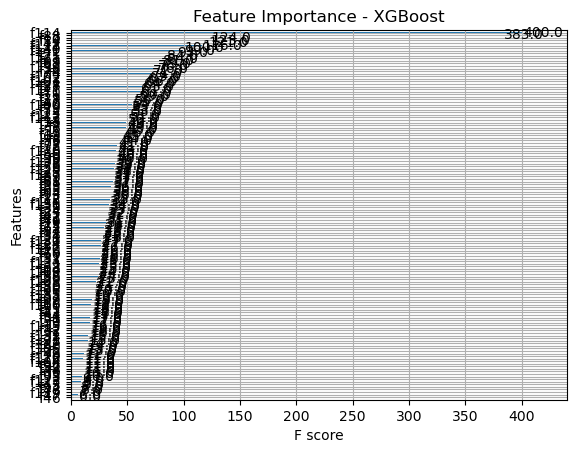

Top Features:
VLR_ACTIVE_DAYS_W12: 0.4217
VLR_ACTIVE_DAYS_W11: 0.2548
DATA_ACTIVE_DAYS_W12: 0.0619
VLR_ACTIVE_DAYS_M3: 0.0221
VOICE_ACTIVE_DAYS_W12: 0.0178
VOICE_ACTIVE_DAYS_M3: 0.0163
VLR_ACTIVE_DAYS_W10: 0.0162
OG_VC_W12_CNT: 0.0146
GPRS_W12_USG_MBS: 0.0087
VOICE_SINCE_LAST_USED: 0.0072
OG_VC_M3_CNT: 0.0063
DATA_ACTIVE_DAYS_M3: 0.0057
VOICE_ACTIVE_DAYS_M1: 0.0048
VOICE_ACTIVE_DAYS_M2: 0.0045
VLR_ACTIVE_DAYS_M2: 0.0044
VLR_ACTIVE_DAYS_W8: 0.0043
GPRS_M3_USG_MBS: 0.0039
OG_VC_MOUS_W12_CNT: 0.0037
VLR_ACTIVE_DAYS_M1: 0.0036
VLR_ACTIVE_DAYS_W7: 0.0034
RECHARGE_SINCE_LAST_USED: 0.0032
RECH_ACTIVE_DAYS_M3: 0.0032
RECHARGE_M3_CNT: 0.0031
RECH_ACTIVE_DAYS_M1: 0.0029
SMS_ACTIVE_DAYS_W12: 0.0028
OG_VC_MOUS_M3_CNT: 0.0028
VOICE_ACTIVE_DAYS_W11: 0.0028
GPRS_W12_CNT: 0.0028
VLR_ACTIVE_DAYS_W9: 0.0027
RECHARGE_M2_CNT: 0.0026
DATA_ACTIVE_DAYS_M1: 0.0026
FREE_GPRS_USG_M3: 0.0024
VLR_ACTIVE_DAYS_W1: 0.0023
RECHARGE_W12_CNT: 0.0022
DATA_ACTIVE_DAYS_W1: 0.0020
DATA_ACTIVE_DAYS_M2: 0.0019
DATA_ACTIVE_DA

In [129]:
# Initialize the XGBoost classifier
# Convert the target variable to integers
# Calculate the number of positive and negative samples
num_positive = np.sum(y == 1)
num_negative = np.sum(y == 0)

# Compute scale_pos_weight
scale_pos_weight = num_negative / num_positive

print(f"scale_pos_weight: {scale_pos_weight}")

# Now the unique values should be [0, 1]

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,  # Use calculated scale_pos_weight
    n_estimators=200,                   # Common choice
    learning_rate=0.1,                  # Reasonable starting point
    max_depth=5,                        # Moderate depth
    min_child_weight=1,                 # Avoids underfitting
    subsample=0.8,                      # Regularization
    colsample_bytree=0.8,               # Regularization
    gamma=0.1                           # Light regularization
)
# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Feature Importance
importances = xgb_model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model)
plt.title('Feature Importance - XGBoost')
plt.show()

# Get feature importance as a list of tuples (feature name, importance)
feature_importance = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

# Print top features
print("Top Features:")
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")


In [81]:
# Get class probabilities
probabilities = xgb_model.predict_proba(X_test_scaled)

# Convert probabilities to a DataFrame for easier viewing
import pandas as pd
probabilities_df = pd.DataFrame(probabilities, columns=['Probability_Class_0', 'Probability_Class_1'])

# Display the first few rows of probabilities
print(probabilities_df.head())


   Probability_Class_0  Probability_Class_1
0             0.757083             0.242917
1             0.126984             0.873016
2             0.119056             0.880944
3             0.740271             0.259729
4             0.568141             0.431859


In [103]:
import pandas as pd

# Get class probabilities
probabilities = xgb_model.predict_proba(X_test_scaled)

# Convert probabilities to a DataFrame
probabilities_df = pd.DataFrame(probabilities, columns=['Probability_Class_0', 'Probability_Class_1'])

# Convert y_test to a DataFrame
actual_labels_df = pd.DataFrame(y_test.values, columns=['CHURN_LABEL'])

# Combine the probabilities with the actual labels
combined_df = pd.concat([actual_labels_df, probabilities_df], axis=1)

# Display the combined DataFrame
print(combined_df.head(2))


   CHURN_LABEL  Probability_Class_0  Probability_Class_1
0            1             0.757083             0.242917
1            1             0.126984             0.873016


In [93]:
# Filter the DataFrame to include only rows where Actual_Label is 1
churned_df = combined_df[combined_df['CHURN_LABEL'] == 1]

# Display the filtered DataFrame
print(churned_df.head())


    CHURN_LABEL  Probability_Class_0  Probability_Class_1
0             1             0.757083             0.242917
1             1             0.126984             0.873016
2             1             0.119056             0.880944
6             1             0.181026             0.818974
28            1             0.386986             0.613014


In [101]:
churned_df.to_csv('Prediction_Probabilities_Test_Set_Actual_Churned.csv',index=False)

In [109]:
# Filter the DataFrame to include only rows where Actual_Label is 0 (not churned)
non_churned_df = combined_df[combined_df['CHURN_LABEL'] == 0]

# Display the filtered DataFrame
print(non_churned_df.head(50))


    CHURN_LABEL  Probability_Class_0  Probability_Class_1
3             0             0.740271             0.259729
4             0             0.568141             0.431859
5             0             0.241086             0.758914
7             0             0.798551             0.201449
8             0             0.406283             0.593717
9             0             0.725388             0.274612
10            0             0.158983             0.841017
11            0             0.980115             0.019885
12            0             0.991596             0.008404
13            0             0.883927             0.116073
14            0             0.977368             0.022632
15            0             0.586316             0.413684
16            0             0.734439             0.265561
17            0             0.913880             0.086120
18            0             0.981430             0.018570
19            0             0.809990             0.190010
20            

In [113]:
combined_df.to_csv('ALL_Test_set.csv',index = False)

In [117]:
import pickle

with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

print("Model saved successfully as xgb_model.pkl")

Model saved successfully as xgb_model.pkl
